# **Procesamiento de Lenguaje natural, para clasificación de sentimientos** 🤗

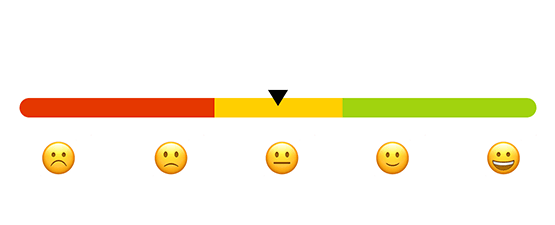

### **Documentación**

*  [**API de Twitter**](https://developer.twitter.com/en/docs/twitter-api)

*  [**Librería para API tweepy**](https://docs.tweepy.org/en/stable/)

*  [**Scikit-Learn - Machine Learning**](https://scikit-learn.org/stable/index.html)

*  [**Artículo de apoyo**](https://drive.google.com/file/d/1xKizvboTVENrMcg9REAH57KHGGAjUrF5/view?usp=sharing)

*  [**Presentación**](https://docs.google.com/presentation/d/1YpvG67R97GWWIZjaNXFBDS5n7QVgEDylg_XiJSsnI70/edit?usp=sharing)

# **Librerías necesarias**

In [2]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [3]:
import pandas as pd
import tweepy # pip install tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import re
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


# **Autenticación API Twitter con tweepy**

In [4]:
api_key = '############'
api_key_secret = '############'

access_token = '############'
access_token_secret = '############'

In [5]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


**Obtener informacion de nuestro perfil**

In [ ]:
data = api.me()
print(json.dumps(data._json, indent=2))

{
  "id": 1643942910,
  "id_str": "1643942910",
  "name": "Dylan Montoya",
  "screen_name": "dylan_montoya22",
  "location": "Medellin",
  "profile_location": null,
  "description": "Biomedical Engineer || Data Scientist",
  "url": "https://t.co/suuExWq8aC",
  "entities": {
    "url": {
      "urls": [
        {
          "url": "https://t.co/suuExWq8aC",
          "expanded_url": "https://linktr.ee/dylanmontoya",
          "display_url": "linktr.ee/dylanmontoya",
          "indices": [
            0,
            23
          ]
        }
      ]
    },
    "description": {
      "urls": []
    }
  },
  "protected": false,
  "followers_count": 65,
  "friends_count": 571,
  "listed_count": 0,
  "created_at": "Sun Aug 04 00:40:04 +0000 2013",
  "favourites_count": 2484,
  "utc_offset": null,
  "time_zone": null,
  "geo_enabled": false,
  "verified": false,
  "statuses_count": 87,
  "lang": null,
  "status": {
    "created_at": "Mon Aug 22 17:12:09 +0000 2022",
    "id": 156176316445007872

**Obtener timeline**

In [ ]:
for tweets in tweepy.Cursor(api.user_timeline, screen_name='nike' ,tweet_mode='extended').items(1):
  print(json.dumps(tweets._json, indent=2))

{
  "created_at": "Tue Aug 23 16:09:59 +0000 2022",
  "id": 1562109908702543872,
  "id_str": "1562109908702543872",
  "full_text": "Sue Bird details how the pandemic changed the course of history for the @WNBA.\n\nWatch #TheGreatestDuo with @S10bird and @DianaTaurasi presented by @nike and @togethxr",
  "truncated": false,
  "display_text_range": [
    0,
    166
  ],
  "entities": {
    "hashtags": [
      {
        "text": "TheGreatestDuo",
        "indices": [
          86,
          101
        ]
      }
    ],
    "symbols": [],
    "user_mentions": [
      {
        "screen_name": "WNBA",
        "name": "WNBA",
        "id": 17159397,
        "id_str": "17159397",
        "indices": [
          72,
          77
        ]
      },
      {
        "screen_name": "S10Bird",
        "name": "Sue Bird",
        "id": 1638756846,
        "id_str": "1638756846",
        "indices": [
          107,
          115
        ]
      },
      {
        "screen_name": "DianaTaurasi",
        "

**Hacer busqueda de tweets**

In [ ]:
for tweets in tweepy.Cursor(api.search, q='jupiter', tweet_mode='extended').items(4):
  #print(json.dumps(tweets._json, indent=2))
  print(tweets._json['full_text'])

RT @NASAWebb: Check out the bright waves, swirls, and vortices in Jupiter’s atmosphere — as well as the dark ring system, one million times…
“James Webb telescope reveals ‘remarkable’ details on Jupiter 🪐” by @TimesScience 
https://t.co/2PGuHBmjYp
RT @NASAHubble: Looking good, Jupiter!
 
Like Earth, this giant planet has northern and southern lights called aurorae.

You can see them n…
RT @almaobs: Jupiter with different eyes.
@GeminiObs🤝ALMA 🤝@HUBBLE_space @NASAHubble🤝@NASAWebb @ESA_Webb https://t.co/iO3vTQIx3r


# **Construir nuestro propio dataset**

In [ ]:
# hashtag = api.user_timeline(screen_name='health', lang='en', tweet_mode='extended', count=1000)
# df = pd.DataFrame([tweet.full_text for tweet in hashtag], columns=['Tweets'])
# df.head()

In [ ]:
columnas = ['id', 'user_name', 'user_location', 'user_description', 'user_verified', 'date',
            'text', 'source']
keyword = 'vaccine pfizer'
data = []
for tweet in tweepy.Cursor(api.search, q=keyword, tweet_mode='extended', lang='en').items(1500):
  data.append([tweet.id, tweet.user.screen_name, tweet.user.location, tweet.user.description, tweet.user.verified, 
               tweet.created_at, tweet.full_text, tweet.source])  

df = pd.DataFrame(data, columns=columnas)
df.head()

In [ ]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_verified',
       'date', 'source'], axis=1)
text_df.head()

,text
0,RT @TamaraUgo: Ontario's Chief Medical Officer...
1,@catparkerphoto @React19org @ChildrensHD @Vacc...
2,"RT @TyCardon: Dr. Clare Craig, who was recentl..."
3,RT @latimes: Pfizer says its COVID-19 vaccine ...
4,"RT @TyCardon: Dr. Clare Craig, who was recentl..."


# **Dataset Completo**

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT3ul8F7LODWJTLTMH7eoBa95NaRtFrZmyDsLARQpahhLqd35nfvNGZ0siPni8fPjVheJXVIpZkO3Q6/pub?gid=48206737&single=true&output=csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 6:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
df.sample(frac=0.25).head()
#df['Tweets'][:10]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
1069,1340527395552387073,Stacey,NaN,Is anal retentive hyphenated?,2011-03-09 4:35:26,12,120,472,False,2020-12-20 5:20:11,@realDonaldTrump Do you own stock in Moderna? ...,NaN,Twitter for iPhone,0,1,False
8245,1393282380690075649,Alex Leduc,"Montréal, Québec",Canadian broadcast journalist. Anchor/reporter...,2008-09-16 18:59:01,539,275,356,False,2021-05-14 19:09:40,Don’t think the mask can hide my smile this ti...,"['vaccinated', 'COVID19', 'PfizerBiontech', 'G...",Twitter for iPhone,0,2,False
1546,1341091515196698625,Kessaikssa?,NaN,before i ankle pick you\n\ns l o w e d a n d...,2019-12-09 1:28:29,90,5000,1571,False,2020-12-21 18:41:48,"FN SCAR, Walther, tous les jours, fuck BioNTec...","['Vaccin', 'PfizerBioNTech']",Twitter Web App,0,0,False
5062,1356315525190721537,Brian Roper MD RPh,Northeast US,dual health professional trained as a board-ce...,2009-05-09 5:00:33,363,199,280,False,2021-02-01 18:56:34,Medical Town Hall Webinar this Wed evening - c...,"['online', 'COVID19', 'PfizerBiontech', 'moder...",Twitter for iPhone,0,0,False
3614,1350185679070892037,HTZ,NaN,Mum of 4. That sums me up perfectly.,2015-09-22 19:23:55,76,471,1917,False,2021-01-15 20:58:45,@SkyNewsBreak INOCULATED NOT VACCINATED \n\nIN...,['CoronaVaccine'],Twitter for iPhone,0,0,False


In [ ]:
df.info()
#df.isnull().sum()
#df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  object
 1   user_name         11020 non-null  object
 2   user_location     8744 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(5), object(9)
memory usage: 1.2+ MB


In [ ]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


# **Preprocesamiento**

In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return ' '.join(filtered_text)

In [ ]:
text_df.text = text_df['text'].apply(data_processing)

In [ ]:
text_df = text_df.drop_duplicates('text')

In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
text_df['polarity'] = text_df['text'].apply(polarity)

text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [ ]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [ ]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


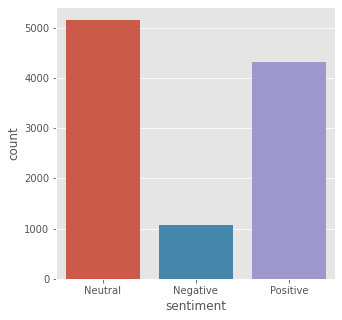

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

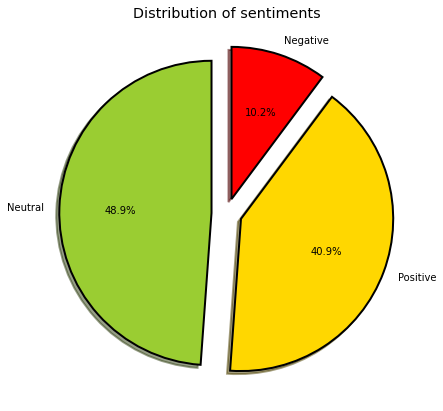

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [ ]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9317,best way get merrygoround pfizer pfizerbiontec...,1.0,Positive
2340,applying emotion pfizerbiontech based best evi...,1.0,Positive
6295,pfizer jab morning efficient wellorganised tha...,1.0,Positive
5041,get art printed awesome products support redbu...,1.0,Positive
1055,already vaccinated getting vaccine soon plan t...,1.0,Positive


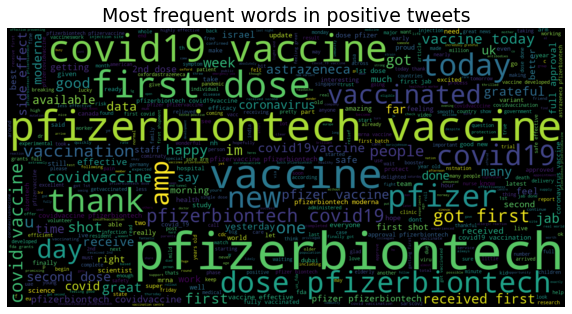

In [ ]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(10,8), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


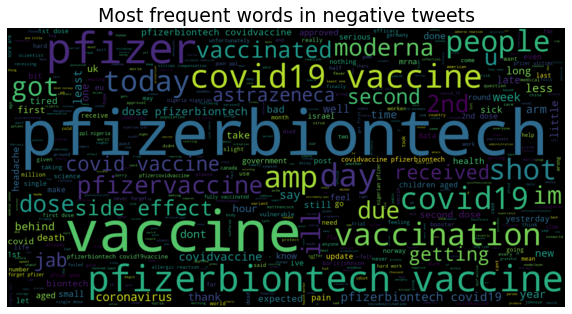

In [ ]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(10,8), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [ ]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7347,anyone else feel like framing vaccine card pfi...,0.0,Neutral
7458,looking forward getting second pfizer shot any...,0.0,Neutral
7454,never thought id running diff vaccine modernav...,0.0,Neutral
7453,john___m dont get choose one person know asked...,0.0,Neutral


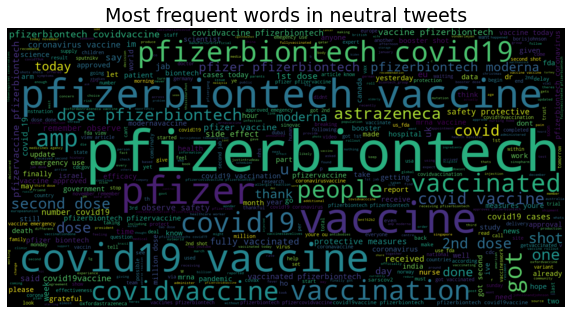

In [ ]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(10,8), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

# **Vectorizar palabras**

In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


### **Modelado de datos**
*   Train 0.75 de los datos
 
*   Test 0.25 de los datos



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_df['text'], text_df['sentiment'], random_state=3)

# **Modelo de regresion logistica**

### **Caracterización**

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train)
print(vectorizer.vocabulary_)

{'waiting': 59572, 'appt': 5353, '2nd': 1366, 'pfizer': 39114, 'covidvaccine': 13380, 'symptoms': 51489, '1st': 813, 'shot': 48075, 'little': 31076, 'nervous': 35406, 'today': 53471, 'waiting appt': 59579, 'appt 2nd': 5354, '2nd pfizer': 1398, 'pfizer covidvaccine': 39184, 'covidvaccine symptoms': 13567, 'symptoms 1st': 51490, '1st shot': 850, 'shot little': 48163, 'little nervous': 31099, 'nervous today': 35410, 'covid19': 12619, 'webinar': 60010, 'launches': 30202, 'partnership': 38343, 'medcafe1': 32837, 'dr': 16894, 'brenda': 8534, 'corcoran': 11872, 'amp': 4251, 'ranp': 43607, 'covid19 webinar': 12934, 'webinar launches': 60012, 'launches partnership': 30207, 'partnership medcafe1': 38344, 'medcafe1 webinar': 32839, 'webinar dr': 60011, 'dr brenda': 16904, 'brenda corcoran': 8535, 'corcoran amp': 11873, 'amp ranp': 4418, 'seen': 47424, 'many': 32225, 'vaccine': 56965, 'videos': 59194, 'far': 20194, 'havent': 24854, 'anyone': 4913, 'aspirating': 5858, 'injecting': 27624, 'isnt': 28

In [ ]:
vectorizer.get_feature_names()[100:150]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['100 thousand',
 '100 transparent',
 '100 trust',
 '100 vaccination',
 '100 years',
 '1000',
 '1000 jackson',
 '1000 patients',
 '1000 teachers',
 '10000',
 '10000 advers',
 '10000 australians',
 '10000 doses',
 '100000',
 '100000 pregna',
 '1000000000',
 '1000000000 mark',
 '1000s',
 '1000s people',
 '1000th',
 '1000th tweet',
 '10021471',
 '10021471 vaccine',
 '1004',
 '1004 fat',
 '1005',
 '1005 2021',
 '100620',
 '100620 pfizerbiontech',
 '10062021',
 '10072021',
 '10072021 pfizerbiontech',
 '100daysofcode',
 '100daysofcode codenewbies',
 '100f',
 '100f fever',
 '100fold',
 '100fold resistant',
 '100m',
 '100m doses',
 '100m oxford',
 '100pm',
 '100pm 400pm',
 '100s',
 '100s dna',
 '100s years',
 '100th',
 '100th birthday',
 '101',
 '101 effective']

In [ ]:
X_train_vectorized = vectorizer.transform(X_train)

In [ ]:
print("Size of X_train:", (X_train_vectorized.shape))
print("Size of y_train:", (y_train.shape))
print("Size of X_test:", (X_test.shape))
print("Size of y_test:", (y_test.shape))

Size of X_train: (7907, 62075)
Size of y_train: (7907,)
Size of X_test: (2636,)
Size of y_test: (2636,)


In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [ ]:
predicts = model.predict(vectorizer.transform(X_test))

In [ ]:
print('Test accuracy: {:.4f}%'.format(accuracy_score(y_test, predicts)*100))

Test accuracy: 84.2185%


In [ ]:
print(confusion_matrix(y_test, predicts))
print("\n")
print(classification_report(y_test, predicts))

[[  78  158   48]
 [   5 1250   11]
 [  13  181  892]]


              precision    recall  f1-score   support

    Negative       0.81      0.27      0.41       284
     Neutral       0.79      0.99      0.88      1266
    Positive       0.94      0.82      0.88      1086

    accuracy                           0.84      2636
   macro avg       0.85      0.69      0.72      2636
weighted avg       0.85      0.84      0.83      2636



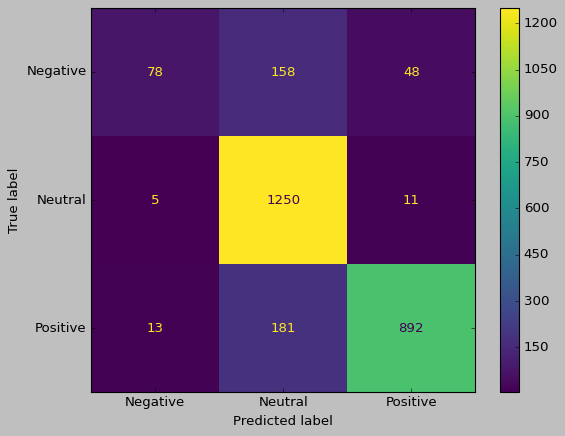

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, predicts, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot()

In [ ]:
vect = TfidfVectorizer(min_df=2).fit(X_train)
len(vect.get_feature_names())


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5131

In [ ]:
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predicts_2 = model.predict(vect.transform(X_test))
print('Test accuracy: {:.4f}%'.format(accuracy_score(y_test, predicts_2)*100))

Test accuracy: 84.3323%


In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [ ]:
y_pred = grid.predict(vect.transform(X_test))

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.45%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 148   86   50]
 [   8 1234   24]
 [  20   90  976]]


              precision    recall  f1-score   support

    Negative       0.84      0.52      0.64       284
     Neutral       0.88      0.97      0.92      1266
    Positive       0.93      0.90      0.91      1086

    accuracy                           0.89      2636
   macro avg       0.88      0.80      0.83      2636
weighted avg       0.89      0.89      0.89      2636



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train_vectorized, y_train)

LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(vect.transform(X_test))
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 90.36%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 163   79   42]
 [   6 1242   18]
 [  20   89  977]]


              precision    recall  f1-score   support

    Negative       0.86      0.57      0.69       284
     Neutral       0.88      0.98      0.93      1266
    Positive       0.94      0.90      0.92      1086

    accuracy                           0.90      2636
   macro avg       0.90      0.82      0.85      2636
weighted avg       0.90      0.90      0.90      2636



In [ ]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(X_train_vectorized, y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [ ]:
y_pred = grid.predict(vect.transform(X_test))

In [ ]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 90.82%


In [ ]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[ 195   47   42]
 [  20 1211   35]
 [  32   66  988]]


              precision    recall  f1-score   support

    Negative       0.79      0.69      0.73       284
     Neutral       0.91      0.96      0.94      1266
    Positive       0.93      0.91      0.92      1086

    accuracy                           0.91      2636
   macro avg       0.88      0.85      0.86      2636
weighted avg       0.91      0.91      0.91      2636

